<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter5/Python_Codes_Chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 5.3

---------------------------- CODE OUTPUT ----------------------------- 

Equlibrium point x0 =  1.12246

Near x0: V(x) =  7.143*x**2 - 16.04*x + 8.75


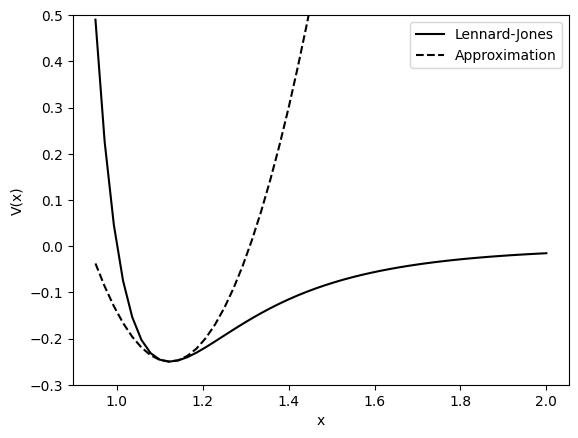

In [ ]:
%reset -f

from sympy import symbols, series, diff,solve, simplify,lambdify,evalf,N
import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, s, ep = symbols('x, s, ep')

V = 4*ep*( (s/x)**12 - (s/x)**6)

#solve for equilibrium points
x0 = solve(diff(V,x).subs([(s,1),(ep,1/4)]),x)[1]

print('Equlibrium point x0 = ',  N(x0,6))

expansion = simplify(series(V, x, 1.122462, 3).removeO() \
    .subs([(s,1),(ep,0.25)]))

print('\nNear x0: V(x) = ',  expansion.subs([(s,1),(ep,0.25)]).evalf(4))

expansion_plot = lambdify(x,expansion.subs([(s,1),(ep,1/4)]),'numpy')

V_plot = lambdify(x,V.subs([(s,1),(ep,1/4)]),'numpy')

x_values = np.linspace(0.95,2.0,50)

plt.plot(x_values,V_plot(x_values), 'k',label = "Lennard-Jones")
plt.plot(x_values,expansion_plot(x_values),'k--', label='Approximation')
plt.ylim(-0.3,0.5);
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend()
plt.show()


# Example 5.4

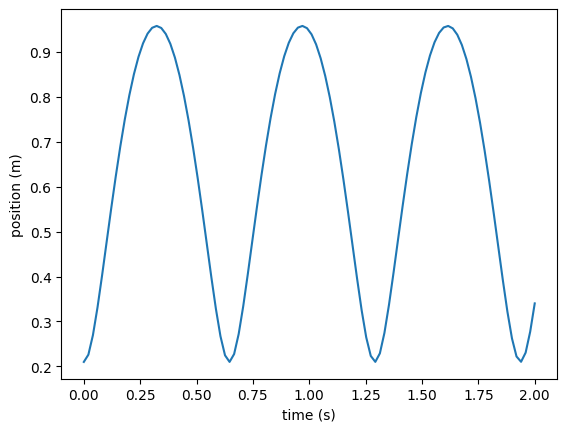

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

a, b, c, m = 4, 25, 8, 1

inits = [0.21, 0]  # initial conditions

# derivatives function for odeint
def deriv(y,t):
    x, v = y
    dydt = [v, (a/x**2 - 2*b*x + 3*c*x**2)/m ]
    return dydt

times = np.linspace(0, 2.0, 100)

# solve the ode using odeint
soln = odeint(deriv, inits, times)

plt.plot(times,soln[:,0])
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.show()


# Example 5.5

In [ ]:
%reset -f

from sympy import integrate, symbols
from sympy.vector import  CoordSys3D, ParametricIntegral,ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, t, x1, y1 = symbols('x, y, t, x1, y1')

C = CoordSys3D('C')     # define Cartesian system, named here C

# Method 1: using two line integrals

intx=integrate(x1*(x1/2), (x1,0,2))

inty=integrate(-y1**2, (y1,0,1))

print('The line integral using two line integrals = ',intx + inty)

# Method 2: using ParametricRegion and ParametricIntegral

x = t
y = t/2

F = x*y*C.i - y**2*C.j   # Force vector

diagonal = ParametricRegion((t, t/2), (t, 0, 2))

W = ParametricIntegral(F, diagonal)
print('The line integral using ParametricIntegral = ',W)


---------------------------- CODE OUTPUT ----------------------------- 

The line integral using two line integrals =  1
The line integral using ParametricIntegral =  1


# Example 5.6

In [ ]:
%reset -f

from sympy import symbols
from sympy.vector import  CoordSys3D, ParametricIntegral,\
ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

t = symbols('t')

# using ParametricRegion and ParametricIntegral

# Force vector
F = C.x*C.y*C.i - C.y**2*C.j

line1 = ParametricRegion((t, 0), (t, 0, 2))

integr1 = ParametricIntegral(F, line1)
print('integral along line 1 = ', integr1)

line2 = ParametricRegion((2, t), (t, 0, 1))
integr2 = ParametricIntegral(F, line2)
print('integral along line 2 = ',integr2)

print('\nWork done is :', integr1+integr2)


---------------------------- CODE OUTPUT ----------------------------- 

integral along line 1 =  0
integral along line 2 =  -1/3

Work done is : -1/3


# Example 5.7

In [ ]:
%reset -f


from sympy import  symbols, sin ,cos, pi
from sympy.vector import  CoordSys3D, ParametricIntegral,ParametricRegion

print('-'*28,'CODE OUTPUT','-'*29,'\n')

C = CoordSys3D('C')     # define Cartesian system, named here C

t = symbols('t')

# Force vector
F = C.x*C.y*C.i - C.y**2*C.j

path = ParametricRegion((cos(t), sin(t)), (t, 0, pi/2))

integr = ParametricIntegral(F, path)
print('The integral using ParametricIntegral = ', integr)



---------------------------- CODE OUTPUT ----------------------------- 

The integral using ParametricIntegral =  -2/3


# Example 5.8

In [ ]:
%reset -f

from sympy.vector import CoordSys3D, curl

print('-'*28,'CODE OUTPUT','-'*29,'\n')

R = CoordSys3D('R')

F = R.x*R.y*R.i - R.y**2 * R.j

print('The curl of F = ', curl(F))



---------------------------- CODE OUTPUT ----------------------------- 

The curl of F =  (-R.x)*R.k
